# Estimate polarization from raytracing

### Feb 15, 2021

## Code

In [31]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
# import deDisperse_util as util
# from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
# import pyrex.custom.ara as ara


In [32]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

In [52]:
nofz = pd.read_csv("./data/nofz.txt")

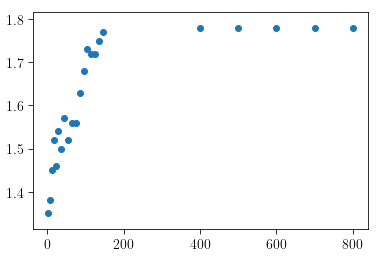

In [53]:
plt.scatter(nofz.depth, nofz.n_ice)

In [54]:
from scipy.optimize import curve_fit

def func(z, a, b, c):
    return a-(a-b)*(np.exp(-z*c))

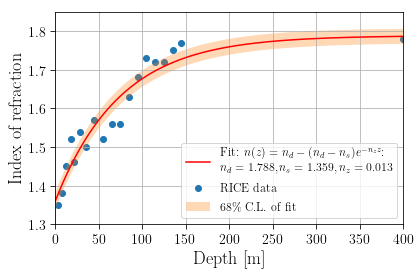

In [59]:
plt.figure(figsize=(6,4))
popt, pcov = curve_fit(func, np.array(nofz.depth), np.array(nofz.n_ice))
popt
x = np.linspace(0,400, 450)
plt.scatter(nofz.depth, nofz.n_ice, label = "RICE data")
plt.plot(x, func(x, *popt), 'r-',
         label='Fit: $n(z) = n_d-(n_d-n_s)e^{-n_z z}$:\n $n_d=%5.3f, n_s=%5.3f, n_z=%5.3f$' % tuple(popt))

plt.fill_between(x,  func(x, *popt)-func(x, *np.sqrt(np.diag(pcov))), func(x, *popt)+func(x, *np.sqrt(np.diag(pcov))), alpha = 0.3, label = "68\% C.L. of fit")
plt.ylim(1.3,1.85)
plt.xlim(0,400)

plt.grid()
plt.xlabel("Depth [m]")
plt.ylabel("Index of refraction")
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig("./nofz_fromRICE.pdf")

In [37]:
np.sqrt(np.diag(pcov))

array([0.03878263, 0.02728159, 0.00322687])